In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [12]:
IMAGE_SIZE = 256
CHANNELS = 3



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        './output/train/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 16504 images belonging to 15 classes.


In [14]:
train_generator.class_indices


{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [16]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break
    count+=1
    if count>2:
        break

[10.  7.  1.  3.  1.  5.  7. 12.  8.  2.  0. 11.  1.  2. 14. 12.  6. 12.
  6.  2. 14. 12.  2.  1. 12.  6.  6. 12.  5. 12.  3.  5.]
[[[0.42617366 0.36735013 0.38695797]
  [0.4214375  0.36261398 0.38222182]
  [0.41670138 0.35787782 0.3774857 ]
  ...
  [0.45390376 0.39115867 0.40292338]
  [0.43484226 0.37209713 0.38386184]
  [0.4806697  0.4179246  0.42968932]]

 [[0.49002543 0.43120188 0.45080972]
  [0.47818506 0.4193615  0.43896934]
  [0.46634468 0.40752113 0.42712897]
  ...
  [0.4515357  0.38879058 0.40055528]
  [0.4306981  0.367953   0.3797177 ]
  [0.5144148  0.45166972 0.46343443]]

 [[0.49219257 0.433369   0.45297685]
  [0.4969287  0.43810517 0.457713  ]
  [0.5016649  0.44284135 0.4624492 ]
  ...
  [0.4491676  0.38642251 0.39818722]
  [0.42655396 0.36380887 0.37557358]
  [0.5481599  0.4854148  0.4971795 ]]

 ...

 [[0.64546144 0.6023242  0.6258536 ]
  [0.6431373  0.6        0.62352943]
  [0.6974102  0.654273   0.6778024 ]
  ...
  [0.659434   0.60845363 0.6359046 ]
  [0.65351385 0.602

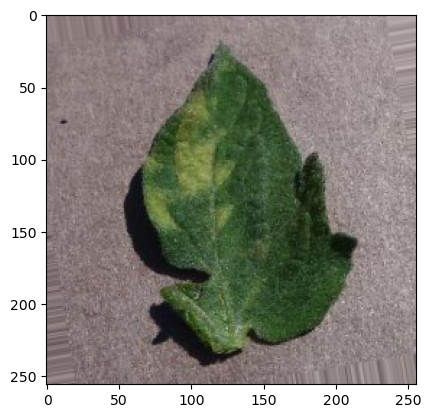

In [17]:
import matplotlib.pyplot as plt

count = 0
for image_batch, label_batch in train_generator:
    # Display the first image in the batch
    plt.imshow(image_batch[0])
    plt.show()
    break


In [18]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        './output/val/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)   

Found 2058 images belonging to 15 classes.


In [19]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        './output/test/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2076 images belonging to 15 classes.


In [20]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5473558  0.4924538  0.4924538 ]
  [0.5470017  0.49209976 0.49209976]
  [0.49057677 0.43567482 0.43567482]
  ...
  [0.4293722  0.38231334 0.3979996 ]
  [0.41776866 0.3707098  0.38639608]
  [0.4526443  0.40558547 0.42127174]]

 [[0.52790236 0.47300038 0.47300038]
  [0.5288317  0.47392976 0.47392976]
  [0.49790084 0.4429989  0.4429989 ]
  ...
  [0.42853132 0.3814725  0.39715877]
  [0.4182112  0.37115234 0.38683861]
  [0.4529983  0.4059395  0.42162576]]

 [[0.45782074 0.4029188  0.4029188 ]
  [0.45844033 0.40353835 0.40353835]
  [0.47558466 0.4206827  0.4206827 ]
  ...
  [0.41636974 0.36931092 0.3849972 ]
  [0.40403068 0.35697186 0.37265813]
  [0.41940513 0.3723463  0.3880326 ]]

 ...

 [[0.8246648  0.80113536 0.80113536]
  [0.8121862  0.7886568  0.7886568 ]
  [0.79977494 0.77624553 0.77624553]
  ...
  [0.65155995 0.6319521  0.6476384 ]
  [0.63871026 0.6191024  0.6347887 ]
  [0.6387988  0.61919093 0.6348772 ]]

 [[0.8201124  0.796583   0.796583  ]
  [0.80543655 0.78190714 0.78190714]


In [31]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [32]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=47,
        batch_size=32,
        validation_data=validation_generator,
        validation_steps=6,
        verbose=1,
        epochs=20,
    )
except Exception as e:
    print("Error during model training:", e)


Epoch 1/20
47/47 [==============================] - 78s 2s/step - loss: 2.3892 - accuracy: 0.2207 - val_loss: 2.2689 - val_accuracy: 0.2448
Epoch 2/20
47/47 [==============================] - 68s 1s/step - loss: 2.2324 - accuracy: 0.2586 - val_loss: 2.3073 - val_accuracy: 0.2135
Epoch 3/20
47/47 [==============================] - 69s 1s/step - loss: 2.0498 - accuracy: 0.3295 - val_loss: 1.9283 - val_accuracy: 0.3542
Epoch 4/20
47/47 [==============================] - 71s 2s/step - loss: 1.8906 - accuracy: 0.3896 - val_loss: 1.8174 - val_accuracy: 0.4427
Epoch 5/20
47/47 [==============================] - 77s 2s/step - loss: 1.6506 - accuracy: 0.4581 - val_loss: 1.5635 - val_accuracy: 0.4948
Epoch 6/20
47/47 [==============================] - 75s 2s/step - loss: 1.5156 - accuracy: 0.4900 - val_loss: 1.7184 - val_accuracy: 0.4427
Epoch 7/20
47/47 [==============================] - 70s 1s/step - loss: 1.3991 - accuracy: 0.5432 - val_loss: 1.5322 - val_accuracy: 0.5052
Epoch 8/20
47/47 [==

In [36]:
scores = model.evaluate(test_generator)

65/65 [==============================] - 51s 786ms/step - loss: 0.6223 - accuracy: 0.8020


In [37]:
scores

[0.6223437190055847, 0.8020231127738953]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
type(history.history['loss'])

list

In [42]:
len(history.history['loss'])

20

In [43]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.389240026473999,
 2.2323830127716064,
 2.049820899963379,
 1.8906195163726807,
 1.6506173610687256]

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [45]:
val_acc

[0.2447916716337204,
 0.2135416716337204,
 0.3541666567325592,
 0.4427083432674408,
 0.4947916567325592,
 0.4427083432674408,
 0.5052083134651184,
 0.5677083134651184,
 0.7083333134651184,
 0.578125,
 0.6927083134651184,
 0.6510416865348816,
 0.5885416865348816,
 0.7083333134651184,
 0.6875,
 0.6510416865348816,
 0.8125,
 0.7395833134651184,
 0.7708333134651184,
 0.7760416865348816]

In [46]:
acc

[0.22074468433856964,
 0.25864362716674805,
 0.3295454680919647,
 0.3896276652812958,
 0.4581117033958435,
 0.490026593208313,
 0.5432180762290955,
 0.5844414830207825,
 0.6030585169792175,
 0.625,
 0.6535904407501221,
 0.6555851101875305,
 0.6376329660415649,
 0.7127659320831299,
 0.7134308218955994,
 0.7180851101875305,
 0.728723406791687,
 0.730053186416626,
 0.7406914830207825,
 0.7732712626457214]

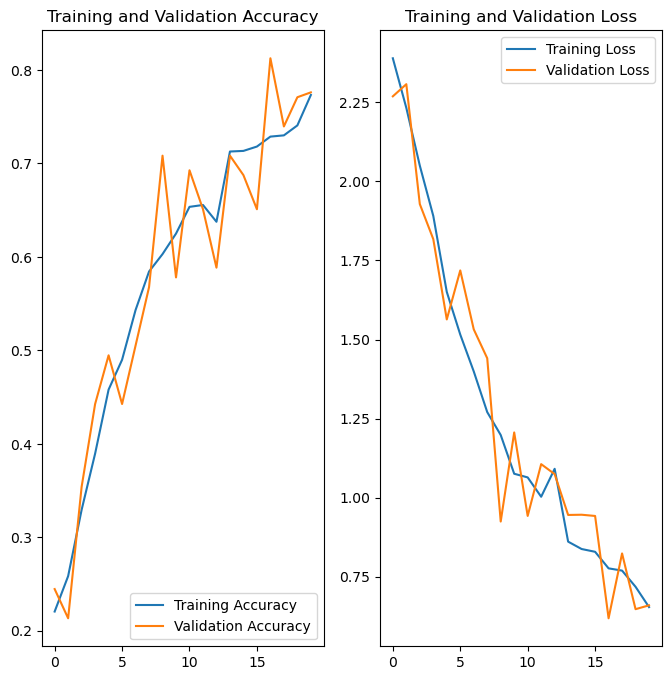

In [47]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%", fontsize=10)
        
        plt.axis("off")
    break
plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Shivam\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Shivam\AppData\Local\Temp\ipykernel_35436\1167497575.py", line 4, in <module>
    for images, labels in test_generator:
                          ^^^^^^^^^^^^^^
NameError: name 'test_generator' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Shivam\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shivam\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^

<Figure size 1500x1500 with 0 Axes>

In [53]:
# Save the entire model (architecture, weights, optimizer state)
model.save('my_deep_learning_model.h5')


c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('my_deep_learning_model.h5')

In [ ]:
import numpy as np
import tensorflow as tf

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 35ms/step


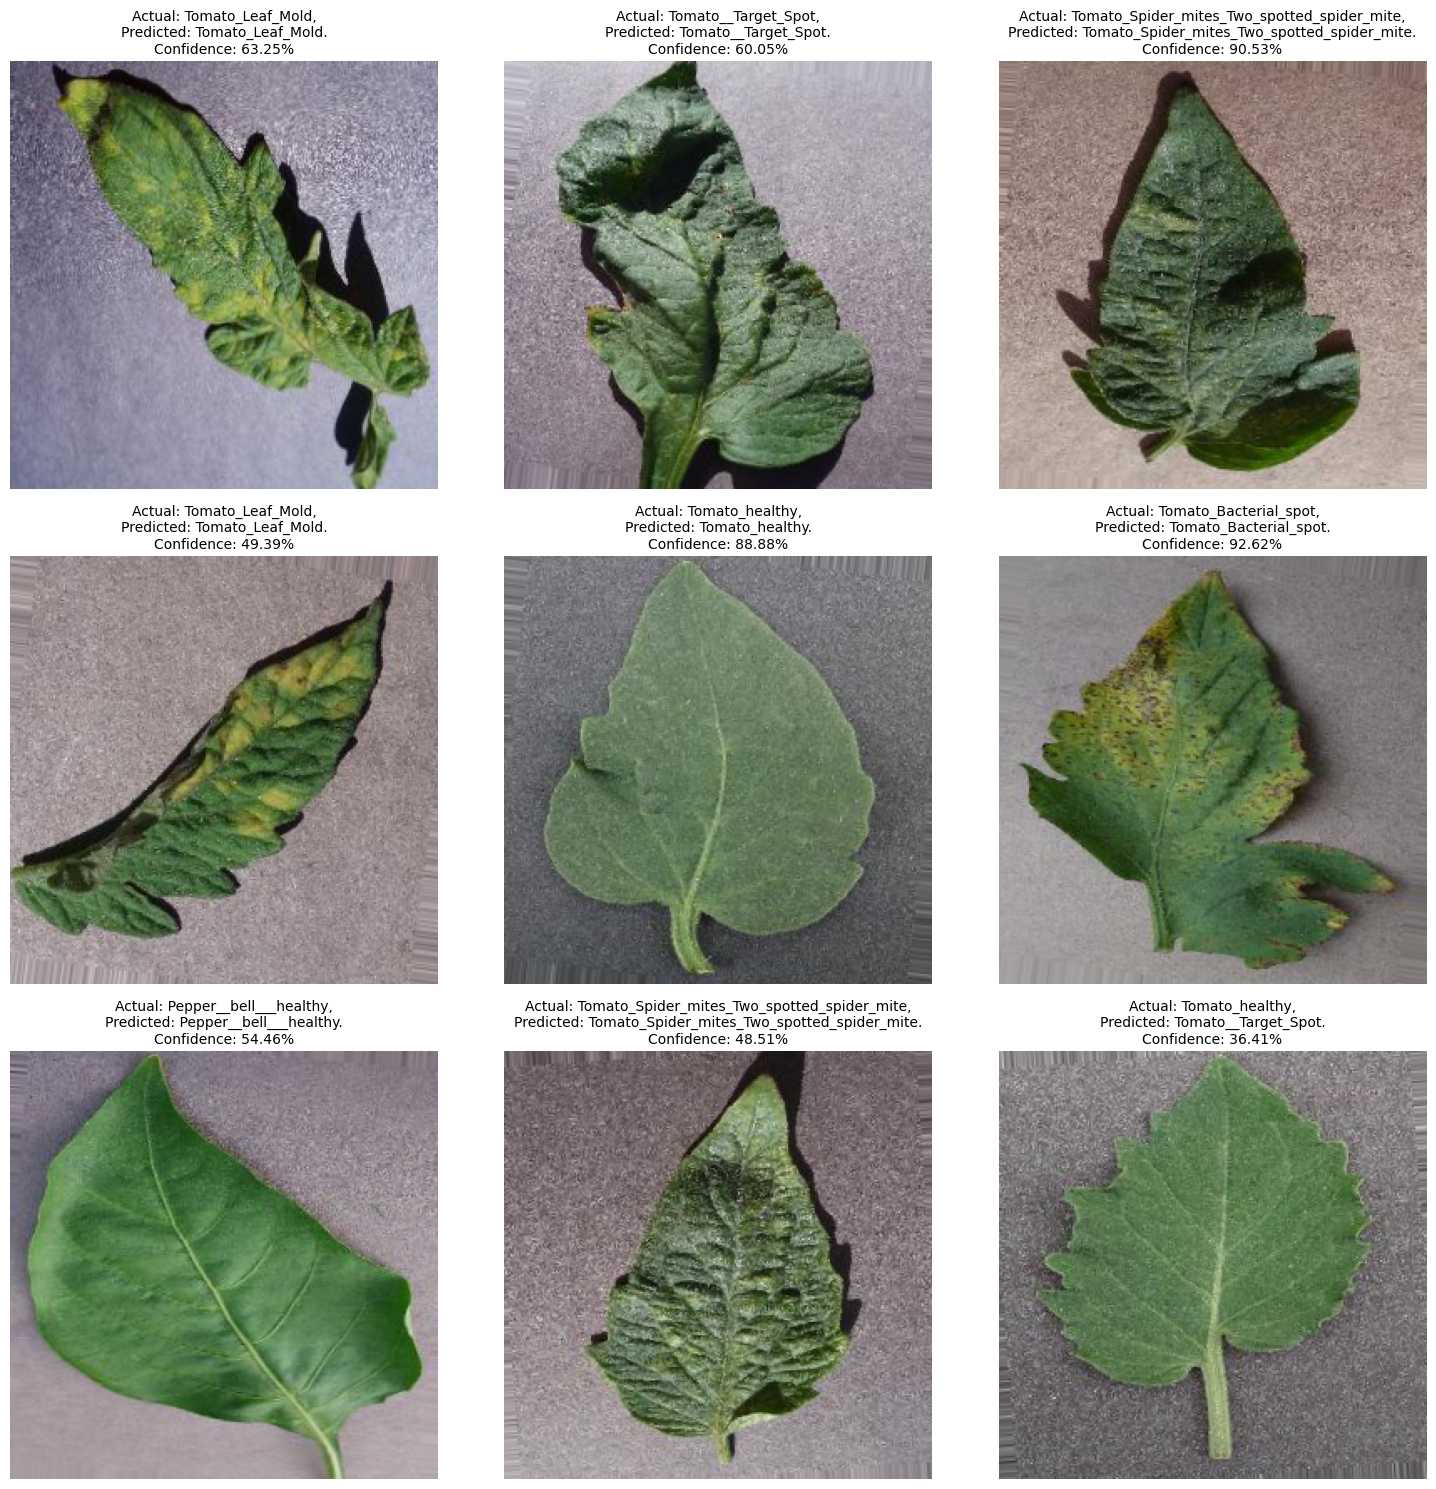

In [22]:
# doing on the test_generator which is basically the testing dataset

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(loaded_model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%", fontsize=10)
        
        plt.axis("off")
    break
plt.tight_layout()
plt.show()


In [26]:
# doing for a specific pic 

predicted_class, confidence = predict(loaded_model, 'output/test/Potato___Early_blight/0ede4acd-3685-40d9-b52b-7b3cb6536fa8___RS_Early.B 7377.JPG')


actual_class = class_names[int(labels[i])] 
print(actual_class)
print(predicted_class)
print(confidence)
# plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%", fontsize=10)

1/1 [==============================] - 0s 35ms/step
Tomato_healthy
Tomato__Target_Spot
36.41
